# Влияние применения аугментаций на качество классификации на датасетах разного размера

https://www.kaggle.com/c/dog-breed-identification/submit

In [ ]:
!nvidia-smi
import torch
torch.cuda.is_available()

Tue Nov  2 16:09:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [ ]:
import pickle
import os
import sys
import numpy as np
import pandas as pd
from skimage import io
from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path
from multiprocessing.pool import ThreadPool
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, models
import torch.nn as nn
from matplotlib import colors, pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=6eff84219bb24cb3f7cc1621c98b9a6475e7dcd7c295e11fa5be31592ddebc1b
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [ ]:
sys.path.insert(1, '/content/drive/MyDrive/Diplom')
from functions import *

In [ ]:
!unzip -q /content/drive/MyDrive/Diplom/dog-breed-identification.zip -d dogs

In [ ]:
!unzip -q /content/drive/MyDrive/Diplom/dogs_short_train.zip -d dogs_short

In [ ]:
d = create_labels('/content/dogs/labels.csv')

In [ ]:
transform_train = transforms.Compose([
          transforms.ToTensor(),
          transforms.ToPILImage(),
          transforms.RandomChoice([
          transforms.ColorJitter(),
          transforms.RandomGrayscale(p=0.1),
          transforms.RandomHorizontalFlip(p=0.5),
          transforms.RandomAffine(20),
          transforms.RandomRotation(20),
          transforms.RandomVerticalFlip(),
          ]),
          transforms.ToTensor(),
          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [ ]:
TRAIN_DIR = Path('/content/dogs/train')
TEST_DIR = Path('/content/dogs/test')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))

train_val_labels = [d[path.name] for path in train_val_files]

test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
 stratify=train_val_labels)

train_dataset = DogsDataset(train_files, mode='train', transform=transform_train)

val_dataset = DogsDataset(val_files, mode='val')

test_dataset = DogsDataset(test_files, mode='test')

In [ ]:
TRAIN_DIR_SHORT = Path('/content/dogs_short')

train_val_files_short = sorted(list(TRAIN_DIR_SHORT.rglob('*.jpg')))

train_val_labels_short = [d[path.name] for path in train_val_files_short]

train_files_short, val_files_short = train_test_split(train_val_files_short, test_size=0.25, \
 stratify=train_val_labels_short)

train_dataset_short = DogsDataset(train_files_short, mode='train', transform=transform_train)

val_dataset_short = DogsDataset(val_files_short, mode='val')

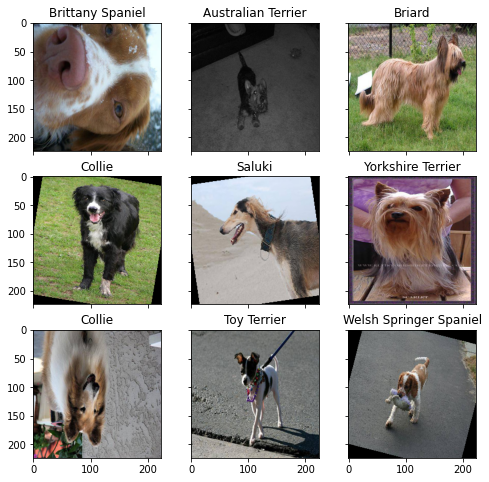

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), sharey=True, sharex=True)
for fig_x in ax.flatten():
 random_characters = int(np.random.uniform(0,1000))
 im_val, label = train_dataset[random_characters]
 img_label = " ".join(map(lambda x: x.capitalize(),\
 val_dataset.label_encoder.inverse_transform([label])[0].split('_')))

 imshow(im_val.data.cpu(), \
 title=img_label,plt_ax=fig_x)

# ResNet 152

**Полный датасет**

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

loss 3.236935374197498


epoch:  10%|█         | 1/10 [08:30<1:16:38, 510.98s/it]

Saved model with val acc 0.6639280125195618

Epoch 001 train_loss: 3.2369   val_loss 1.4502 train_acc 0.3540 val_acc 0.6639
loss 1.329642888727121


epoch:  20%|██        | 2/10 [16:57<1:07:48, 508.56s/it]

Saved model with val acc 0.6928794992175275

Epoch 002 train_loss: 1.3296   val_loss 0.9840 train_acc 0.6131 val_acc 0.6929
loss 0.8749840743480138


epoch:  30%|███       | 3/10 [25:21<59:05, 506.53s/it]

Saved model with val acc 0.701095461658842

Epoch 003 train_loss: 0.8750   val_loss 0.9430 train_acc 0.7283 val_acc 0.7011
loss 0.6867049168800207


epoch:  40%|████      | 4/10 [33:45<50:32, 505.41s/it]

Saved model with val acc 0.7327856025039123

Epoch 004 train_loss: 0.6867   val_loss 0.8694 train_acc 0.7875 val_acc 0.7328
loss 0.5739855543303795


epoch:  50%|█████     | 5/10 [42:08<42:02, 504.48s/it]


Epoch 005 train_loss: 0.5740   val_loss 1.1288 train_acc 0.8225 val_acc 0.6866
loss 0.47592063062719103


epoch:  60%|██████    | 6/10 [50:32<33:36, 504.21s/it]


Epoch 006 train_loss: 0.4759   val_loss 0.9818 train_acc 0.8436 val_acc 0.7132
loss 0.42039762534144776


epoch:  70%|███████   | 7/10 [58:55<25:11, 503.94s/it]


Epoch 007 train_loss: 0.4204   val_loss 0.9771 train_acc 0.8629 val_acc 0.7234
loss 0.36749071170090697


epoch:  80%|████████  | 8/10 [1:07:18<16:47, 503.70s/it]


Epoch 008 train_loss: 0.3675   val_loss 0.9418 train_acc 0.8838 val_acc 0.7273
loss 0.34405638222715546


epoch:  90%|█████████ | 9/10 [1:15:42<08:23, 503.75s/it]

Saved model with val acc 0.7394366197183099

Epoch 009 train_loss: 0.3441   val_loss 0.9896 train_acc 0.8898 val_acc 0.7394
loss 0.29250012281791304


epoch: 100%|██████████| 10/10 [1:24:06<00:00, 504.60s/it]



Epoch 010 train_loss: 0.2925   val_loss 0.9938 train_acc 0.9035 val_acc 0.7394


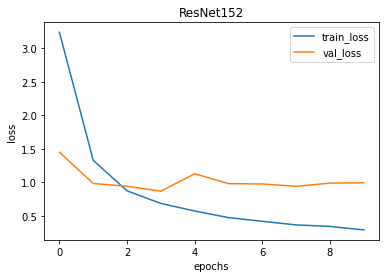

In [ ]:
save_name = '/content/DogsModelRESNET152.pth'
model = initialize_and_train_model("ResNet152", 120, 10, 32, train_dataset, val_dataset, save_name)

In [ ]:
res = make_prediction(save_name, model, test_files)
res.to_csv('/content/drive/MyDrive/Diplom/resnet152_augm.csv', index = False)

Kaggle score 1.01417

**Сокращенный датасет**

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

loss 4.27360246422215


epoch:  10%|█         | 1/10 [03:12<28:50, 192.22s/it]

Saved model with val acc 0.494300518134715

Epoch 001 train_loss: 4.2736   val_loss 3.1769 train_acc 0.1636 val_acc 0.4943
loss 1.7836386163205031


epoch:  20%|██        | 2/10 [06:22<25:30, 191.31s/it]

Saved model with val acc 0.6248704663212435

Epoch 002 train_loss: 1.7836   val_loss 1.1879 train_acc 0.5100 val_acc 0.6249
loss 1.042466197600833


epoch:  30%|███       | 3/10 [09:33<22:17, 191.06s/it]

Saved model with val acc 0.6310880829015544

Epoch 003 train_loss: 1.0425   val_loss 1.2009 train_acc 0.6874 val_acc 0.6311
loss 0.7453338235905227


epoch:  40%|████      | 4/10 [12:44<19:05, 190.84s/it]

Saved model with val acc 0.6715025906735751

Epoch 004 train_loss: 0.7453   val_loss 1.0899 train_acc 0.7739 val_acc 0.6715
loss 0.5701267038308403


epoch:  50%|█████     | 5/10 [15:54<15:53, 190.77s/it]

Saved model with val acc 0.7036269430051814

Epoch 005 train_loss: 0.5701   val_loss 1.0565 train_acc 0.8223 val_acc 0.7036
loss 0.5005454729371711


epoch:  60%|██████    | 6/10 [19:04<12:41, 190.43s/it]


Epoch 006 train_loss: 0.5005   val_loss 1.0763 train_acc 0.8361 val_acc 0.6860
loss 0.4371421222535077


epoch:  70%|███████   | 7/10 [22:14<09:30, 190.15s/it]


Epoch 007 train_loss: 0.4371   val_loss 1.1314 train_acc 0.8582 val_acc 0.6933
loss 0.3820543518781992


epoch:  80%|████████  | 8/10 [25:24<06:20, 190.22s/it]


Epoch 008 train_loss: 0.3821   val_loss 1.2667 train_acc 0.8873 val_acc 0.6684
loss 0.303975701867957


epoch:  90%|█████████ | 9/10 [28:35<03:10, 190.35s/it]


Epoch 009 train_loss: 0.3040   val_loss 1.2170 train_acc 0.9046 val_acc 0.7036
loss 0.30591406667782806


epoch: 100%|██████████| 10/10 [31:46<00:00, 190.61s/it]



Epoch 010 train_loss: 0.3059   val_loss 1.2641 train_acc 0.9011 val_acc 0.6819


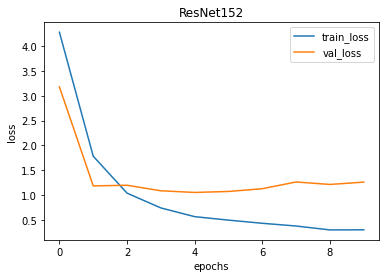

In [ ]:
save_name = '/content/DogsModelRESNET152_short.pth'
model = initialize_and_train_model("ResNet152", 120, 10, 32, train_dataset_short, val_dataset_short, save_name)

In [ ]:
res = make_prediction(save_name, model, test_files)
res.to_csv('/content/drive/MyDrive/Diplom/resnet152_augm_short.csv', index = False)

Kaggle score 1.11357

# VGG19

**Полный датасет**

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

loss 2.778591150096711


epoch:  10%|█         | 1/10 [06:49<1:01:27, 409.67s/it]

Saved model with val acc 0.6713615023474179

Epoch 001 train_loss: 2.7786   val_loss 1.1720 train_acc 0.3346 val_acc 0.6714
loss 1.0086900379120947


epoch:  20%|██        | 2/10 [13:38<54:31, 408.93s/it]

Saved model with val acc 0.7355242566510173

Epoch 002 train_loss: 1.0087   val_loss 0.8668 train_acc 0.7001 val_acc 0.7355
loss 0.665740577135203


epoch:  30%|███       | 3/10 [20:24<47:33, 407.62s/it]


Epoch 003 train_loss: 0.6657   val_loss 1.0294 train_acc 0.8024 val_acc 0.7164
loss 0.49818517836459525


epoch:  40%|████      | 4/10 [27:09<40:40, 406.75s/it]


Epoch 004 train_loss: 0.4982   val_loss 1.1695 train_acc 0.8496 val_acc 0.6925
loss 0.38447975875999796


epoch:  50%|█████     | 5/10 [33:56<33:53, 406.67s/it]


Epoch 005 train_loss: 0.3845   val_loss 1.1241 train_acc 0.8883 val_acc 0.7171
loss 0.3381783983398286


epoch:  60%|██████    | 6/10 [40:43<27:07, 406.78s/it]


Epoch 006 train_loss: 0.3382   val_loss 1.1679 train_acc 0.8969 val_acc 0.7097
loss 0.296434522098858


epoch:  70%|███████   | 7/10 [47:29<20:19, 406.52s/it]


Epoch 007 train_loss: 0.2964   val_loss 1.2597 train_acc 0.9108 val_acc 0.7070
loss 0.26983402136051404


epoch:  80%|████████  | 8/10 [54:16<13:33, 406.68s/it]


Epoch 008 train_loss: 0.2698   val_loss 1.1298 train_acc 0.9237 val_acc 0.7042
loss 0.22271835660533248


epoch:  90%|█████████ | 9/10 [1:01:04<06:47, 407.27s/it]


Epoch 009 train_loss: 0.2227   val_loss 1.2145 train_acc 0.9339 val_acc 0.7117
loss 0.19657623304341823


epoch: 100%|██████████| 10/10 [1:07:52<00:00, 407.27s/it]



Epoch 010 train_loss: 0.1966   val_loss 1.3184 train_acc 0.9431 val_acc 0.6968


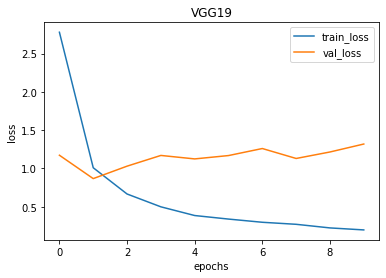

In [ ]:
save_name = '/content/DogsModelVGG19.pth'
model = initialize_and_train_model("VGG19", 120, 10, 32, train_dataset, val_dataset, save_name)

In [ ]:
res = make_prediction(save_name, model, test_files)
res.to_csv('/content/drive/MyDrive/Diplom/vgg19_augm.csv', index = False)

Kaggle score 0.90778

**Сокращенный датасет**

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

loss 4.255382228524193


epoch:  10%|█         | 1/10 [02:36<23:31, 156.88s/it]

Saved model with val acc 0.46735751295336786

Epoch 001 train_loss: 4.2554   val_loss 2.0676 train_acc 0.0996 val_acc 0.4674
loss 1.599276035488229


epoch:  20%|██        | 2/10 [05:13<20:54, 156.82s/it]

Saved model with val acc 0.6259067357512953

Epoch 002 train_loss: 1.5993   val_loss 1.2925 train_acc 0.5622 val_acc 0.6259
loss 0.7911687146248824


epoch:  30%|███       | 3/10 [07:50<18:17, 156.74s/it]

Saved model with val acc 0.6393782383419688

Epoch 003 train_loss: 0.7912   val_loss 1.3281 train_acc 0.7701 val_acc 0.6394
loss 0.51321946725476


epoch:  40%|████      | 4/10 [10:25<15:36, 156.10s/it]


Epoch 004 train_loss: 0.5132   val_loss 1.4831 train_acc 0.8596 val_acc 0.6135
loss 0.4131483260032052


epoch:  50%|█████     | 5/10 [12:59<12:56, 155.32s/it]


Epoch 005 train_loss: 0.4131   val_loss 1.5775 train_acc 0.8793 val_acc 0.6197
loss 0.3092866991318113


epoch:  60%|██████    | 6/10 [15:33<10:20, 155.06s/it]


Epoch 006 train_loss: 0.3093   val_loss 1.5915 train_acc 0.9094 val_acc 0.6249
loss 0.26058678318685846


epoch:  70%|███████   | 7/10 [18:08<07:44, 154.95s/it]


Epoch 007 train_loss: 0.2606   val_loss 1.5771 train_acc 0.9260 val_acc 0.6363
loss 0.2540050340896243


epoch:  80%|████████  | 8/10 [20:43<05:09, 154.91s/it]


Epoch 008 train_loss: 0.2540   val_loss 1.7447 train_acc 0.9260 val_acc 0.6249
loss 0.2697151343893378


epoch:  90%|█████████ | 9/10 [23:19<02:35, 155.18s/it]

Saved model with val acc 0.6518134715025906

Epoch 009 train_loss: 0.2697   val_loss 1.4188 train_acc 0.9243 val_acc 0.6518
loss 0.24521857577364475


epoch: 100%|██████████| 10/10 [25:53<00:00, 155.34s/it]



Epoch 010 train_loss: 0.2452   val_loss 1.5490 train_acc 0.9343 val_acc 0.6321


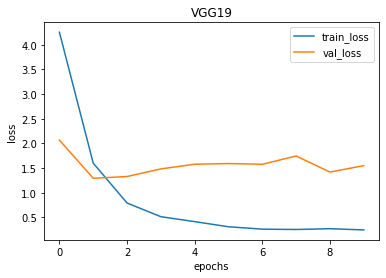

In [ ]:
save_name = '/content/DogsModelVGG19_short.pth'
model = initialize_and_train_model("VGG19", 120, 10, 32, train_dataset_short, val_dataset_short, save_name)

In [ ]:
res = make_prediction(save_name, model, test_files)
res.to_csv('/content/drive/MyDrive/Diplom/vgg19_augm_short.csv', index = False)

Kaggle score 1.39809

# DenseNet161

**Полный датасет**

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


  0%|          | 0.00/110M [00:00<?, ?B/s]

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

loss 4.244943282015169


epoch:  10%|█         | 1/10 [08:46<1:19:00, 526.67s/it]

Saved model with val acc 0.5387323943661972

Epoch 001 train_loss: 4.2449   val_loss 3.3658 train_acc 0.1372 val_acc 0.5387
loss 1.7603094848055085


epoch:  20%|██        | 2/10 [17:25<1:09:34, 521.83s/it]

Saved model with val acc 0.6561032863849765

Epoch 002 train_loss: 1.7603   val_loss 1.2425 train_acc 0.5562 val_acc 0.6561
loss 0.9665428192908478


epoch:  30%|███       | 3/10 [26:03<1:00:42, 520.30s/it]

Saved model with val acc 0.7320031298904538

Epoch 003 train_loss: 0.9665   val_loss 0.9528 train_acc 0.7227 val_acc 0.7320
loss 0.711739567546536


epoch:  40%|████      | 4/10 [34:43<52:00, 520.01s/it]

Saved model with val acc 0.7429577464788732

Epoch 004 train_loss: 0.7117   val_loss 0.8969 train_acc 0.7905 val_acc 0.7430
loss 0.5541228374270463


epoch:  50%|█████     | 5/10 [43:21<43:17, 519.51s/it]


Epoch 005 train_loss: 0.5541   val_loss 0.9869 train_acc 0.8311 val_acc 0.7152
loss 0.4293748714455481


epoch:  60%|██████    | 6/10 [52:00<34:37, 519.30s/it]

Saved model with val acc 0.7433489827856026

Epoch 006 train_loss: 0.4294   val_loss 0.9690 train_acc 0.8638 val_acc 0.7433
loss 0.38323556752513416


epoch:  70%|███████   | 7/10 [1:00:39<25:56, 519.00s/it]


Epoch 007 train_loss: 0.3832   val_loss 0.9929 train_acc 0.8838 val_acc 0.7336
loss 0.30856159638867126


epoch:  80%|████████  | 8/10 [1:09:16<17:17, 518.54s/it]


Epoch 008 train_loss: 0.3086   val_loss 1.0788 train_acc 0.9035 val_acc 0.7257
loss 0.28219107214819195


epoch:  90%|█████████ | 9/10 [1:17:54<08:38, 518.18s/it]


Epoch 009 train_loss: 0.2822   val_loss 1.0719 train_acc 0.9100 val_acc 0.7136
loss 0.24525211955559897


epoch: 100%|██████████| 10/10 [1:26:32<00:00, 519.27s/it]

Saved model with val acc 0.7554773082942097

Epoch 010 train_loss: 0.2453   val_loss 1.0120 train_acc 0.9230 val_acc 0.7555


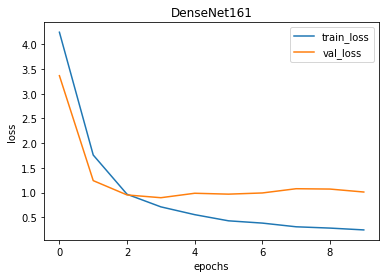

In [ ]:
save_name = '/content/DogsModelDenseNet161.pth'
model = initialize_and_train_model("DenseNet161", 120, 10, 32, train_dataset, val_dataset, save_name)

In [ ]:
res = make_prediction(save_name, model, test_files)
res.to_csv('/content/drive/MyDrive/Diplom/densenet161_augm.csv', index = False)

Kaggle score 0.99121

**Сокращенный датасет**

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

loss 4.627572537787557


epoch:  10%|█         | 1/10 [03:19<29:53, 199.28s/it]

Saved model with val acc 0.20207253886010362

Epoch 001 train_loss: 4.6276   val_loss 4.0754 train_acc 0.0425 val_acc 0.2021
loss 2.648598768899055


epoch:  20%|██        | 2/10 [06:36<26:25, 198.24s/it]

Saved model with val acc 0.4849740932642487

Epoch 002 train_loss: 2.6486   val_loss 1.8996 train_acc 0.3797 val_acc 0.4850
loss 1.3805247045651512


epoch:  30%|███       | 3/10 [09:53<23:04, 197.75s/it]

Saved model with val acc 0.6176165803108808

Epoch 003 train_loss: 1.3805   val_loss 1.3950 train_acc 0.6196 val_acc 0.6176
loss 0.805530344096127


epoch:  40%|████      | 4/10 [13:11<19:45, 197.61s/it]

Saved model with val acc 0.6808290155440414

Epoch 004 train_loss: 0.8055   val_loss 1.1999 train_acc 0.7614 val_acc 0.6808
loss 0.5544275579610801


epoch:  50%|█████     | 5/10 [16:28<16:26, 197.39s/it]


Epoch 005 train_loss: 0.5544   val_loss 1.2816 train_acc 0.8402 val_acc 0.6674
loss 0.44807490240653686


epoch:  60%|██████    | 6/10 [19:44<13:08, 197.09s/it]


Epoch 006 train_loss: 0.4481   val_loss 1.2881 train_acc 0.8669 val_acc 0.6622
loss 0.3854373032703769


epoch:  70%|███████   | 7/10 [23:01<09:50, 196.81s/it]


Epoch 007 train_loss: 0.3854   val_loss 1.2930 train_acc 0.8893 val_acc 0.6798
loss 0.3200144475921061


epoch:  80%|████████  | 8/10 [26:17<06:33, 196.77s/it]

Saved model with val acc 0.6839378238341969

Epoch 008 train_loss: 0.3200   val_loss 1.3259 train_acc 0.9073 val_acc 0.6839
loss 0.2740751189201617


epoch:  90%|█████████ | 9/10 [29:33<03:16, 196.54s/it]


Epoch 009 train_loss: 0.2741   val_loss 1.3480 train_acc 0.9298 val_acc 0.6674
loss 0.22497651890888914


epoch: 100%|██████████| 10/10 [32:50<00:00, 197.03s/it]

Saved model with val acc 0.6922279792746113

Epoch 010 train_loss: 0.2250   val_loss 1.4095 train_acc 0.9378 val_acc 0.6922


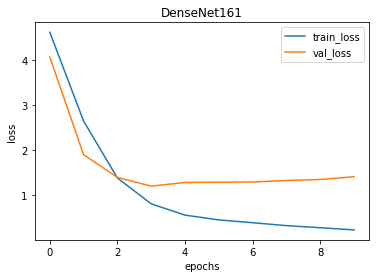

In [ ]:
save_name = '/content/DogsModelDenseNet161_short.pth'
model = initialize_and_train_model("DenseNet161", 120, 10, 32, train_dataset_short, val_dataset_short, save_name)

In [ ]:
res = make_prediction(save_name, model, test_files)
res.to_csv('/content/drive/MyDrive/Diplom/densenet161_augm_short.csv', index = False)

Kaggle score 1.39809

# EfficientNet B6

**Полный датасет**

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b6-c76e70fd.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b6-c76e70fd.pth


  0%|          | 0.00/165M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b6


epoch:   0%|          | 0/10 [00:00<?, ?it/s]

loss 4.3589008811743675


epoch:  10%|█         | 1/10 [13:13<1:58:57, 793.05s/it]

Saved model with val acc 0.6056338028169014

Epoch 001 train_loss: 4.3589   val_loss 3.2924 train_acc 0.1727 val_acc 0.6056
loss 0.9923404836791506


epoch:  20%|██        | 2/10 [26:15<1:44:56, 787.01s/it]

Saved model with val acc 0.7996870109546166

Epoch 002 train_loss: 0.9923   val_loss 0.6838 train_acc 0.7289 val_acc 0.7997
loss 0.3853226423600313


epoch:  30%|███       | 3/10 [39:18<1:31:35, 785.09s/it]

Saved model with val acc 0.8125978090766823

Epoch 003 train_loss: 0.3853   val_loss 0.6426 train_acc 0.8833 val_acc 0.8126
loss 0.23960352107192634


epoch:  40%|████      | 4/10 [52:21<1:18:24, 784.06s/it]

Saved model with val acc 0.8204225352112676

Epoch 004 train_loss: 0.2396   val_loss 0.6542 train_acc 0.9296 val_acc 0.8204
loss 0.1734427621876279


epoch:  50%|█████     | 5/10 [1:05:22<1:05:15, 783.17s/it]


Epoch 005 train_loss: 0.1734   val_loss 0.7139 train_acc 0.9482 val_acc 0.8118
loss 0.1444972756637288


epoch:  60%|██████    | 6/10 [1:18:24<52:11, 782.82s/it]


Epoch 006 train_loss: 0.1445   val_loss 0.7179 train_acc 0.9571 val_acc 0.8142
loss 0.11419340641251888


epoch:  70%|███████   | 7/10 [1:31:26<39:07, 782.54s/it]


Epoch 007 train_loss: 0.1142   val_loss 0.8118 train_acc 0.9682 val_acc 0.8122
loss 0.10564430696158435


epoch:  80%|████████  | 8/10 [1:44:29<26:05, 782.51s/it]

Saved model with val acc 0.8274647887323944

Epoch 008 train_loss: 0.1056   val_loss 0.7571 train_acc 0.9697 val_acc 0.8275
loss 0.07205756286673293


epoch:  90%|█████████ | 9/10 [1:57:31<13:02, 782.40s/it]


Epoch 009 train_loss: 0.0721   val_loss 0.8642 train_acc 0.9803 val_acc 0.8048
loss 0.08644680018217113


epoch: 100%|██████████| 10/10 [2:10:33<00:00, 783.34s/it]


Epoch 010 train_loss: 0.0864   val_loss 0.8158 train_acc 0.9753 val_acc 0.8114


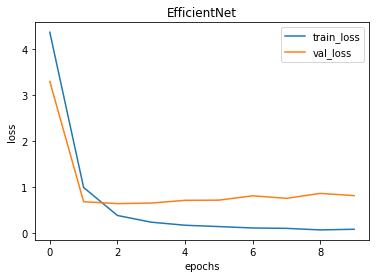

In [ ]:
save_name = '/content/EfficientNetB6.pth'
model = initialize_and_train_model("EfficientNet", 120, 10, 16, train_dataset, val_dataset, save_name)

In [ ]:
res = make_prediction(save_name, model, test_files)
res.to_csv('/content/drive/MyDrive/Diplom/effnet_augm.csv', index = False)

Kaggle score 0.71773

**Сокращенный датасет**

Loaded pretrained weights for efficientnet-b6


epoch:   0%|          | 0/10 [00:00<?, ?it/s]

loss 4.746013535173767


epoch:  10%|█         | 1/10 [05:00<45:00, 300.03s/it]

Saved model with val acc 0.2694300518134715

Epoch 001 train_loss: 4.7460   val_loss 4.6039 train_acc 0.0256 val_acc 0.2694
loss 2.700401863946295


epoch:  20%|██        | 2/10 [09:56<39:42, 297.81s/it]

Saved model with val acc 0.7481865284974093

Epoch 002 train_loss: 2.7004   val_loss 0.9367 train_acc 0.4914 val_acc 0.7482
loss 0.6349400862288838


epoch:  30%|███       | 3/10 [14:52<34:39, 297.13s/it]

Saved model with val acc 0.7854922279792745

Epoch 003 train_loss: 0.6349   val_loss 0.8089 train_acc 0.8150 val_acc 0.7855
loss 0.3087683768213867


epoch:  40%|████      | 4/10 [19:48<29:40, 296.72s/it]

Saved model with val acc 0.7937823834196891

Epoch 004 train_loss: 0.3088   val_loss 0.7301 train_acc 0.9049 val_acc 0.7938
loss 0.21090710804608354


epoch:  50%|█████     | 5/10 [24:44<24:42, 296.53s/it]

Saved model with val acc 0.8093264248704662

Epoch 005 train_loss: 0.2109   val_loss 0.7731 train_acc 0.9388 val_acc 0.8093
loss 0.16982800268115963


epoch:  60%|██████    | 6/10 [29:40<19:45, 296.28s/it]


Epoch 006 train_loss: 0.1698   val_loss 0.8265 train_acc 0.9519 val_acc 0.7824
loss 0.11997208738716302


epoch:  70%|███████   | 7/10 [34:36<14:48, 296.22s/it]


Epoch 007 train_loss: 0.1200   val_loss 0.8308 train_acc 0.9678 val_acc 0.7969
loss 0.10256637632395985


epoch:  80%|████████  | 8/10 [39:32<09:52, 296.12s/it]


Epoch 008 train_loss: 0.1026   val_loss 0.8542 train_acc 0.9692 val_acc 0.7938
loss 0.12135365213438827


epoch:  90%|█████████ | 9/10 [44:28<04:56, 296.01s/it]


Epoch 009 train_loss: 0.1214   val_loss 0.8226 train_acc 0.9685 val_acc 0.7917
loss 0.08590226015011634


epoch: 100%|██████████| 10/10 [49:24<00:00, 296.42s/it]


Epoch 010 train_loss: 0.0859   val_loss 0.8697 train_acc 0.9761 val_acc 0.7865


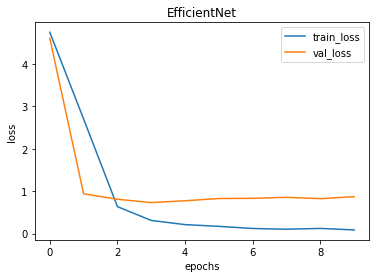

In [ ]:
save_name = '/content/EfficientNetB6_short.pth'
model = initialize_and_train_model("EfficientNet", 120, 10, 16, train_dataset_short, val_dataset_short, save_name)

In [ ]:
res = make_prediction(save_name, model, test_files)
res.to_csv('/content/drive/MyDrive/Diplom/effnet_augm_short.csv', index = False)

Kaggle score 0.75062